<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>

<img width="200px" src="https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png">

---
# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p style="font-weight:bold">ADVICE</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p style="font-weight:bold">WARNING</p>

<p>If using <a href="https://try.jupyter.org">try.jupyter.org</a> do not rely on the server for anything you want to last - your server will be <span style="font-weight:bold">deleted after 10 minutes of inactivity</span>. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

#### A 1.1.1

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def fibonai(n):
    fib_list = [1, 1]
    iter = 2
    while iter < n:
        x = fib_list[iter-1] + fib_list[iter-2]
        iter+=1
        fib_list.append(x)

    fib_dict = {count: x for (count, x) in enumerate(fib_list)}
    return \
        1 if n == 1 else 1 if n==2 else fib_dict[n-1] + fib_dict[n-2]


print("Fibionacci number of %.i equals %.i" % (15, fibonai(15)))

Fibionacci number of 15 equals 987


#### Q 1.1.2
What's the complexity of your implementation?


#### A 1.1.2
* As a first step we construct an empty python list `fib_list` with first two elements $F1$ and $F2$ respectfully equal to {1}, {1}
* After running a while loop with the ending point of provided *n* we end up having sorted Fibonacci numbers stored in `fib_list` variable (which is stored in Operational memory, which we will try to avoid it in the next section)
* We construct a new python dictionary `fib_dict` in order to relatively efficiently retrieve values based in their index
* `return` statement includes hardcoded values for $n=1$ and $n=2$ inputs, otherwise calculates $F_n$ for any provided $n$

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

#### A 1.1.3

In [31]:
def fibonacci2(n):
    if n==1:
        return 1
    elif n==2:
        return 1
    else:
        return fibonacci2(n-1) + fibonacci2(n-2)

print("Fibionacci number of %.i equals %.i" % (15, fibonacci2(16)))

Fibionacci number of 15 equals 987


#### Q 1.1.4
What's the complexity of your implementation?

#### A 1.1.4
Solved the task by following practises of recursion function usage

#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?

#### A 1.1.5

We should consider construing a generator in order to reduce required computational power and avoid storing massive lists in memory. </br>
*Note:* we have to use a `islice` tool in order to get the $n$-th element of a generator. Additionally we have to remember that after seeing this number it's being automatically excluded from the generator.</br>
As bonus execution time provided to solidify the approach. </br>
Implementation is as follows:


In [32]:
import time
from itertools import islice
def fibonacci(n):
    a, b, count = 1, 1, 0
    while 1:
        if count > n: return
        yield a
        a, b = b, a + b
        count += 1

start_time = time.time()
print("Fibionacci number of %.i equals %.i" % (9999, next(
    islice(
        fibonacci(99999), 99999, None
        )
    )), "\n")
print("The computation took --- %s seconds ---" % (time.time() - start_time))


Fibionacci number of 9999 equals 2597406934722172416615503402127591541488048538651769658472477070395253454351127368626555677283671674475463758722307443211163839947387509103096569738218830449305228763853133492135302679278956701051276578271635608073050532200243233114383986516137827238124777453778337299916214634050054669860390862750996639366409211890125271960172105060300350586894028558103675117658251368377438684936413457338834365158775425371912410500332195991330062204363035213756525421823998690848556374080179251761629391754963458558616300762819916081109836526352995440694284206571046044903805647136346033000520852277707554446794723709030979019014860432846819857961015951001850608264919234587313399150133919932363102301864172536477136266475080133982431231703431452964181790051187957316766834979901682011849907756686456845066287392485603914047605199550066288826345877189410680370091879365001733011710028310473947456256091444932821374855573864080579813028266640270354294412104919995803131876805899186

## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
<img src=https://www.epicurus.com/food/recipes/wp-content/uploads/2015/03/Pi-Day.jpg width="480">

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).


### A 2.1: Finding $\pi$ in a random uniform </br>
Generally we could imagine a circle with $R=0.5$, where it's aread equals $\pi*r^2 = \pi/4$. In this case $\pi/4$ would equal ratio of innerly distributed dots to all outside dots. This approach called *Monte Carlo*. </br>

$\pi/4$ ≈ $N__inner / N__total$

In [33]:
from random import random
import math

def find_pi(num_out):
    num_inner = 0
    for throw in range(num_out):
        x = random()**2
        y = random()**2

        if math.sqrt(x+y) < 1.:
            num_inner+=1

    pi = 4 * num_inner / num_out

    return  pi

print(find_pi(99999))

3.136391363913639



### Q 3.2 Model Selection and Assesment

Consider a multiclass classification problem with a large number of features $p >> N$, for e.g $p=10000, N=100$ The task is threefold
1. Find a "good" subset of features that show strong _univariate_ correlation with class labels
2. Using the "good" subset, build a multi class classifier
3. Estimate the generalization error of the final model

Given this dataset, outline your approach and please be sure to cover the following
- Data splitting
- Model Selection: either estimating the performance of different classifiers or the same classifier with different hyperparameters
- Model Assessment: having chosen a classifier, estimating the generalization error

Assume all features are numerical, the dataset contains no NULLS, outliers, etc. and doesn't require any preprocessing.



### A 3.2 Model Selection and Assesment

1. The make_classification function will be taken to generate required data set (with no natural law to approximate behind). 
2. Random Forest feature importance will be used in order to come up with a good subset of relevant features 
3. Subset of basic sklearn error/accuracy estimations will be used 

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Generating the test data set with 1000 observations and 10000 features with not underlying Nature Law. 
X,y = make_classification(n_samples=1000, n_features=10000, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)

# Splitting the dataset to Training and Testing sample with 30% of rows ratio. 
# Passing stratified flag on order to get peer distribution of class labels for each of the data subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                                                    random_state=1)




In [35]:
# Cheking the shape of outcome dataset 
X_train.shape

(700, 10000)

In [36]:
# Creating base classifier, which is this case will be Random Forest 
rand_clf = RandomForestClassifier(random_state=1)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [37]:

# Calculating the base score
rand_clf.score(X_test, y_test)



0.8366666666666667

In [38]:


# Filtering out features wih feature significance gt 0. 
# Reassigning Train and Validation test based on the new feature subset 
X_train = X_train[:, np.sort(rand_clf.feature_importances_) > 0]
X_test = X_test[:, np.sort(rand_clf.feature_importances_) > 0]





In [39]:

np.unique(np.sort(rand_clf.feature_importances_), return_counts=True)



(array([0.00000000e+00, 2.73829642e-05, 2.81781130e-05, ...,
        1.56784270e-03, 1.71471382e-03, 6.85737375e-02]),
 array([5641,    1,    1, ...,    1,    1,    1]))

In [40]:
# Creating 3 well known classificators in order to compare their performance. 
# For Logistic Regression we use L2 regularization. 
# C parameter is regularization strength indicatro (with negative correlation, thus the lower value -> stronger regularization strength) 

clf1 = LogisticRegression(penalty='l2',
                         C=0.001,
                         random_state=1)
clf2 = RandomForestClassifier(max_depth=1,
                             criterion='entropy',
                             random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1,
                           p=2,
                           metric='minkowski')

# Creating pipelines for the given classifiers. In real life problem we usually prepare two types of preprocessing (for cat. and cont. features);
# Also we could include PCA (feature extraction method of combining feature together with little or no impact change) 

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                 ['clf', clf3]])

clf_labels = ['Logistic regression', 'Random Forest', 'KNN']
print('10-fold cross validation:\n')

# Cross validation needed in order to reduce overfitting of the model and let it generalize well.


for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv=10,
                            scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


all_clf = [pipe1, clf2, pipe3]


10-fold cross validation:

ROC AUC: 0.44 (+/- 0.09) [Logistic regression]
ROC AUC: 0.46 (+/- 0.07) [Random Forest]
ROC AUC: 0.49 (+/- 0.05) [KNN]


#### It's good time to emphasise that our estimators give such poor results due to no underlaying data depenedency. E.g. data was generated completely randomly. 

In [42]:

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv=10,
                            scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.44 (+/- 0.09) [Logistic regression]
Accuracy: 0.46 (+/- 0.07) [Random Forest]
Accuracy: 0.49 (+/- 0.05) [KNN]


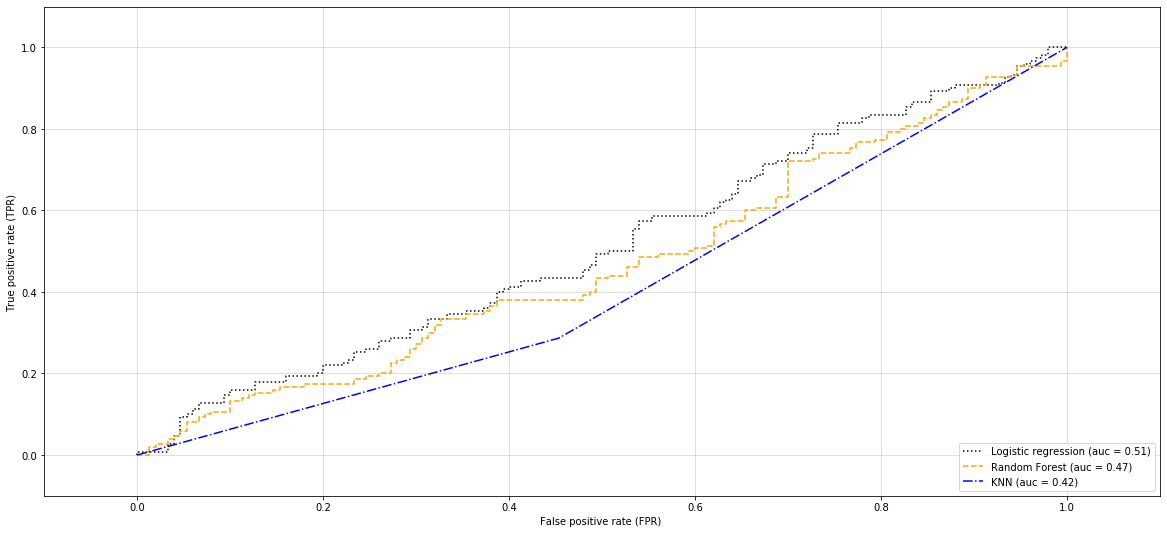

In [43]:
# Plotting the AUC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
plt.figure(figsize=(20,9))

for clf, label, clr, ls \
    in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, tresholds = roc_curve(y_true=y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR) ')
plt.ylabel('True positive rate (TPR) ')
plt.show()


In [44]:
# GridSearch is a brute force operator which builds estimator (or the pipeline) with all possible combinations of params that we pass in params variable.
# In our sandbox example we will test only two HyperParametrs which are max_depth and min_samples_leaf 

from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2],
          'min_samples_leaf': [1, 2, 4]}
grid = GridSearchCV(estimator=clf2,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=1,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [45]:
# We can access best parametrs out of GridSearch work 

print(grid.best_params_)

# Assigning best combination to a new classificator 
best_grid = grid.best_estimator_

{'max_depth': 2, 'min_samples_leaf': 1}


In [46]:
y_pred = best_grid.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score



print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))



Accuracy Score : 0.49666666666666665
Precision Score : 0.4967741935483871
Recall Score : 0.5133333333333333
F1 Score : 0.5049180327868853


In [ ]:
There are quite a few optimizations and enhansments which could be applied to the given problem. Among them:
- PCA 
- Outliers detection 
- Gradient Boosting classifiers 
- Stacking (majority vote classifiers, etc.)


Nevertheless, on this the scope of the examination has reached the surface. 
Thank you for taking time and going through it! 

✨✨
